In [40]:
                                    # Business Sales Analysis

## Objective
Analyze sales trends, customer behavior, and product performance to generate business insights.


SyntaxError: invalid syntax (3540036184.py, line 4)

In [1]:
#Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:

#Loading Dataset



df = pd.read_csv("..\BuisSalesAnalysis\DataSets\Sales_Data.csv")
df.head()


<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Apoor\AppData\Local\Temp\ipykernel_26852\4217465142.py:5: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("..\BuisSalesAnalysis\DataSets\Sales_Data.csv")


,Order ID,Order Date,Customer ID,Product Name,Category,Quantity,Price,Year,Month,Month_Name,Total Sales
0,1001,2024-01-01,CUST100,Laptop,Electronics,1,55000,2024,1,January,55000
1,1002,2024-01-02,CUST101,Mouse,Accessories,2,800,2024,1,January,1600
2,1003,2024-01-03,CUST102,Keyboard,Accessories,1,1500,2024,1,January,1500
3,1004,2024-01-04,CUST103,Monitor,Electronics,1,12000,2024,1,January,12000
4,1005,2024-01-05,CUST104,Laptop,Electronics,2,55000,2024,1,January,110000


In [3]:
#Dataset Overview 

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      20 non-null     int64 
 1   Order Date    20 non-null     object
 2   Customer ID   20 non-null     object
 3   Product Name  20 non-null     object
 4   Category      20 non-null     object
 5   Quantity      20 non-null     int64 
 6   Price         20 non-null     int64 
 7   Year          20 non-null     int64 
 8   Month         20 non-null     int64 
 9   Month_Name    20 non-null     object
 10  Total Sales   20 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 1.8+ KB


Order ID        0
Order Date      0
Customer ID     0
Product Name    0
Category        0
Quantity        0
Price           0
Year            0
Month           0
Month_Name      0
Total Sales     0
dtype: int64

In [6]:
#Data Cleaning 

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

# Create Total Sales column
df['Total Sales'] = df['Quantity'] * df['Price']

df.head()


,Order ID,Order Date,Customer ID,Product Name,Category,Quantity,Price,Year,Month,Month_Name,Total Sales
0,1001,2024-01-01,CUST100,Laptop,Electronics,1,55000,2024,1,January,55000
1,1002,2024-01-02,CUST101,Mouse,Accessories,2,800,2024,1,January,1600
2,1003,2024-01-03,CUST102,Keyboard,Accessories,1,1500,2024,1,January,1500
3,1004,2024-01-04,CUST103,Monitor,Electronics,1,12000,2024,1,January,12000
4,1005,2024-01-05,CUST104,Laptop,Electronics,2,55000,2024,1,January,110000


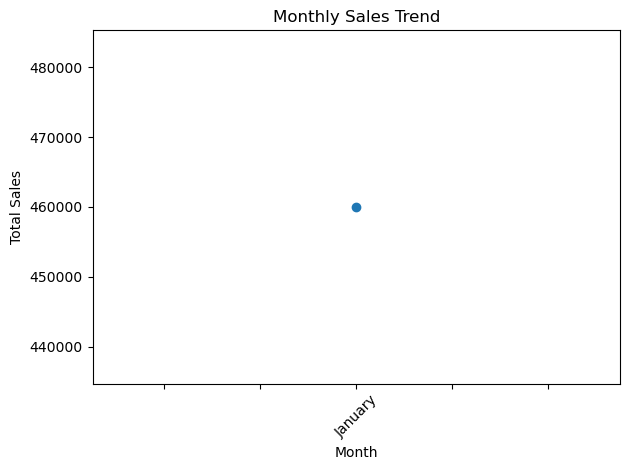

In [4]:
#Monthly Sales Trend 

monthly_sales = df.groupby('Month_Name')['Total Sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Monthly_Sales.png")
plt.show()


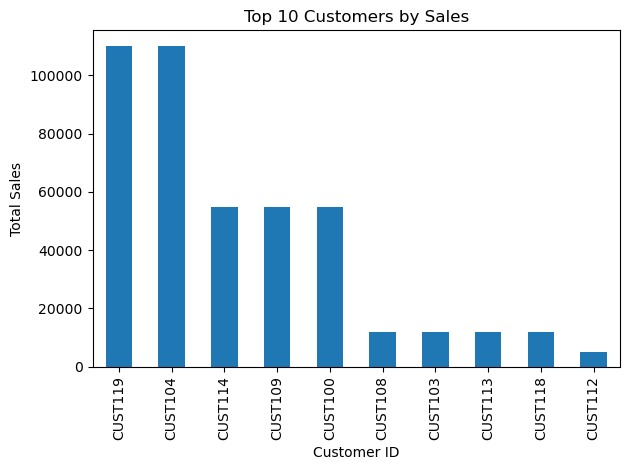

In [5]:
#Top 10 Customers 

top_customers = df.groupby('Customer ID')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("Top_Customers.png")
plt.show()


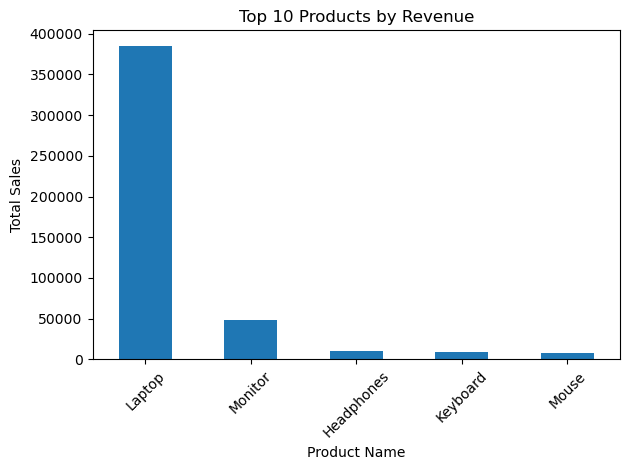

In [6]:
#Top 10 Products

top_products = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig("Top_Products.png")
plt.show()


In [7]:
#ABC Product Analysis 
product_sales = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False)

cumulative_sales = product_sales.cumsum() / product_sales.sum()

abc_category = []
for value in cumulative_sales:
    if value <= 0.8:
        abc_category.append('A')
    elif value <= 0.95:
        abc_category.append('B')
    else:
        abc_category.append('C')

abc_df = pd.DataFrame({
    'Product Name': product_sales.index,
    'Total Sales': product_sales.values,
    'ABC Category': abc_category
})

abc_df



,Product Name,Total Sales,ABC Category
0,Laptop,385000,B
1,Monitor,48000,B
2,Headphones,10000,C
3,Keyboard,9000,C
4,Mouse,8000,C


In [8]:
#Key Insights 

print("Best Month:", df.groupby('Month_Name')['Total Sales'].sum().idxmax())
print("Top Product:", df.groupby('Product Name')['Total Sales'].sum().idxmax())
print("Top Customer:", df.groupby('Customer ID')['Total Sales'].sum().idxmax())


Best Month: January
Top Product: Laptop
Top Customer: CUST104


In [11]:
#Saving Cleaned Data 

df_clean = df.copy()
df_clean.drop_duplicates(inplace=True)
df_clean['Order Date']=pd.to_datetime(df_clean['Order Date'],errors='coerce')

df_clean['Total Sales'] = df_clean['Quantity'] * df_clean['Price']
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month
df_clean['Month_Name'] = df_clean['Order Date'].dt.month_name()

df.to_csv("Cleaned_Sales_Data.csv", index=False)